In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
import sqlite3
db_filename = './Resources/hawaii.sqlite'
newline_indent = '\n   '
db=sqlite3.connect(db_filename)
db.text_factory = str
cur = db.cursor()
result = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = sorted(list(zip(*result))[0])
print ("\ntables are:"+newline_indent+newline_indent.join(table_names))
for table_name in table_names:
    result = cur.execute("PRAGMA table_info('%s')" % table_name).fetchall()
    column_names = list(zip(*result))[1]
    print (("\ncolumn names for %s:" % table_name)
           +newline_indent
           +(newline_indent.join(column_names)))
db.close()
print ("\nexiting.")


tables are:
   measurement
   station

column names for measurement:
   id
   station
   date
   prcp
   tobs

column names for station:
   id
   station
   name
   latitude
   longitude
   elevation

exiting.


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9061660e80>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.

max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(max_date)
#for q in recent_date:
#    print(q.date)
    


('2017-08-23',)


In [57]:
latest_twelve = dt.datetime(2017, 8, 23) - timedelta(days = 366)


In [58]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > latest_twelve).order_by(Measurement.date).all()
for p in results:
    print(p)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016

('2017-06-22', 0.06)
('2017-06-22', 0.28)
('2017-06-23', 0.0)
('2017-06-23', 0.0)
('2017-06-23', None)
('2017-06-23', 0.0)
('2017-06-23', 0.05)
('2017-06-23', 0.12)
('2017-06-23', 0.5)
('2017-06-24', 0.06)
('2017-06-24', 0.0)
('2017-06-24', 0.0)
('2017-06-24', 0.36)
('2017-06-24', 0.22)
('2017-06-25', 0.0)
('2017-06-25', 0.08)
('2017-06-25', 0.0)
('2017-06-25', 0.02)
('2017-06-25', 0.5)
('2017-06-26', 0.0)
('2017-06-26', 0.02)
('2017-06-26', None)
('2017-06-26', None)
('2017-06-26', 0.0)
('2017-06-26', 0.06)
('2017-06-26', 0.02)
('2017-06-27', 0.0)
('2017-06-27', 0.0)
('2017-06-27', 0.0)
('2017-06-27', 0.0)
('2017-06-27', 0.01)
('2017-06-27', 0.1)
('2017-06-28', 0.0)
('2017-06-28', 0.01)
('2017-06-28', 0.0)
('2017-06-28', 0.0)
('2017-06-28', 0.0)
('2017-06-28', 0.02)
('2017-06-29', 0.0)
('2017-06-29', 0.03)
('2017-06-29', None)
('2017-06-29', 0.0)
('2017-06-29', 0.0)
('2017-06-29', 0.0)
('2017-06-29', 0.04)
('2017-06-30', 0.08)
('2017-06-30', 0.04)
('2017-06-30', 0.0)
('2017-06-30', 0.

In [67]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df = df.dropna()
df = df.sort_index()
df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [92]:
gr_df = df.groupby(['date'])
gr_sum = gr_df.sum()
gr_sum.head()

,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32


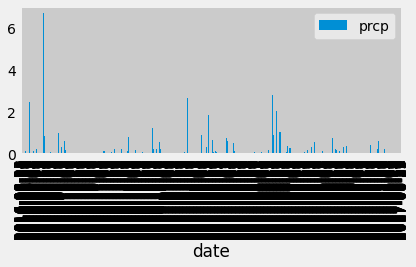

In [94]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
#df.iloc[::-1].plot.bar(title="Precipitation")
df.plot.bar()
plt.tight_layout()
plt.show()



In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number stations in the dataset
first_row = session.query(Station).first()
first_row.__dict__



{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9010214820>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [95]:
session.query(func.count(Measurement.station)).all()

[(19550)]

In [105]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import asc, desc

sta_count = session.query(Measurement.station, func.count(Measurement.station).label('total')).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
#sta_ordered = sta_count.order_by(Measurement.total.desc)
for sta in sta_count:
    print(sta)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()